In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 

bookings = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/Bookings.csv')
sessions = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/Sessions.csv')

# Ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
### 1. Find the number of distinct bookings, sessions, and searches from the given datasets.

#sessions.head()
#sessions.info()
sessions.describe()

,session_id,search_id,search_time,session_starting_time,booking_id
count,1497,1497,1497,1497,366
unique,331,1360,1357,333,338
top,session_118,search_569,2020-05-20T13:42:32Z,2018-10-11T12:38:29.186Z,booking_63
freq,70,8,8,70,2


In [3]:
ex1a = sessions.dropna()
# counting unique values
n1 = len(pd.unique(ex1a['booking_id']))
n2 = len(pd.unique(sessions['session_id']))
n3 = len(pd.unique(sessions['search_id']))

print('!!! Total number of Distinct Bookings are:',n1)
print('!!! Total number of Distinct Sessions are:',n2)
print('!!! Total number of Distinct Searches are:',n3)


!!! Total number of Distinct Bookings are: 338
!!! Total number of Distinct Sessions are: 331
!!! Total number of Distinct Searches are: 1360


In [4]:
### 2. How many sessions have more than one booking?

pivot = pd.pivot_table(
    data=ex1a,
    index='session_id',
    values='booking_id',
    aggfunc='count',
    margins=False,
    margins_name='Grand Total')

n4 = (pivot[pivot['booking_id'] > 1]).value_counts().sum()

print(f"!!! There were {n4} sessions with more than one booking !!!")


!!! There were 35 sessions with more than one booking !!!


In [5]:
### 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution 
###    for all days of the week

ex1a['search_time'] = pd.to_datetime(ex1a.search_time)

In [6]:
ex1a['day'] = ex1a.search_time.dt.day_name()
ex1a['month'] = ex1a.search_time.dt.month_name()

n5 = ex1a.day.value_counts().head(1).to_string()
n5a = n5.split()

print(f"!!! {n5a[0]} have the highest number of bookings({n5a[1]}) !!!")

!!! Thursday have the highest number of bookings(70) !!!


In [7]:
s_pie = ex1a.day.value_counts().head()
print(s_pie)
print(type(s_pie))

Thursday    70
Tuesday     62
Friday      57
Monday      54
Saturday    49
Name: day, dtype: int64
<class 'pandas.core.series.Series'>


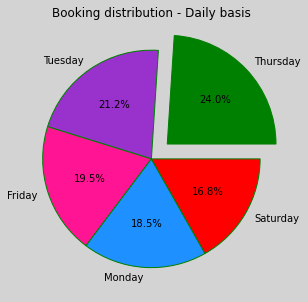

In [8]:
#Pie Chart properties - PIE chart from Panda Series

fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('lightgray')
colors= ('green','darkorchid','deeppink','dodgerblue','red')
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
myexplode = (0.2, 0, 0, 0,0)

series = pd.Series(s_pie)
series.plot.pie(label="",title="Booking distribution - Daily basis",
                colors=colors,autopct ='%1.1f%%',wedgeprops = wp,explode = myexplode)
plt.show(block=True);

In [9]:
### 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

pivot1 = pd.pivot_table(
    data=bookings,
    index='service_name',
    values='INR_Amount',
    aggfunc=['count','sum'],
    margins=False,
    margins_name='Grand Total')

ex4a = pd.DataFrame(pivot1)

column = ['Total Bookings','Total Gross Booking(INR)']
ex4a.columns = column
print(ex4a)

              Total Bookings  Total Gross Booking(INR)
service_name                                          
GOIBIBO                  186                5897637.97
MMT                       48                 665669.08
YATRA                    105                3378702.13


In [51]:
### 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?
ex5 = bookings.drop(['booking_id', 'from_country', 'from_city','to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km'],axis=1)

# Find customer_id who have more than 1 record
ex5a = ex5[ex5.duplicated('customer_id')]

# Convert the dataframe to List which can be used to filter again
ex5b = ex5a['customer_id'].tolist()
print(ex5b)

['customer_179', 'customer_282', 'customer_97', 'customer_246', 'customer_137', 'customer_246', 'customer_176', 'customer_120', 'customer_160', 'customer_217', 'customer_44', 'customer_144', 'customer_97', 'customer_230', 'customer_49', 'customer_255', 'customer_97', 'customer_155', 'customer_230', 'customer_237', 'customer_28', 'customer_265', 'customer_200', 'customer_245', 'customer_176', 'customer_217', 'customer_93', 'customer_297', 'customer_160', 'customer_247', 'customer_33', 'customer_67', 'customer_235']


In [54]:
# Lookup ex5b(list) into bookings.dataframe

ex5c = bookings[bookings.customer_id.isin(ex5b)]
ex5c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 6 to 335
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        59 non-null     object 
 1   booking_id         59 non-null     object 
 2   from_city          59 non-null     object 
 3   from_country       59 non-null     object 
 4   to_city            59 non-null     object 
 5   to_country         59 non-null     object 
 6   booking_time       59 non-null     object 
 7   device_type_used   59 non-null     object 
 8   INR_Amount         59 non-null     float64
 9   service_name       59 non-null     object 
 10  no_of_passengers   59 non-null     float64
 11  days_to_departure  59 non-null     float64
 12  distance_km        59 non-null     float64
dtypes: float64(4), object(9)
memory usage: 6.5+ KB


In [102]:
# Refine the column header

ex5d = ex5c.drop(['booking_id', 'from_country', 
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km'],axis=1)

ex5d['from_to_city'] = ex5d['from_city'] + " | " + ex5d['to_city'] + "|"
ex5d = ex5d.drop(['customer_id','from_city','to_city'],axis=1)
print(ex5d.from_to_city.value_counts().nlargest(10))

Gurgaon | Roissy-en-France|    5
Gurgaon | Rāja Sānsi|          3
Durlaga | Bhubaneswar|         2
Gurgaon | Bagdogra|            2
Bālāpur | Düsseldorf|          2
Gurgaon | Bhubaneswar|         2
Gurgaon | Paris|               2
Gurgaon | Tiruchi|             2
Devanhalli | Gurgaon|          2
Rāja Sānsi | Paris|            1
Name: from_to_city, dtype: int64


In [132]:
n6 = ex5d.from_to_city.value_counts().head(1).to_string()
n6a = n6.split("|")
n6b = (n6a[-1]).strip()

print(f"!!! {n6a[0]} to {n6a[1]} have the highest number of bookings ({n6b}) !!!")

!!! Gurgaon  to  Roissy-en-France have the highest number of bookings (5) !!!


In [157]:
### 6. Which are the top 3 departure cities from where customers book mostly in advance,
###    provided that there have been at least 5 departures from that city?

b1=bookings.dropna()

s1=sessions.drop_duplicates()
s2=s1.dropna()

pd.set_option('display.max_rows', None)
unique=pd.merge(b1,s2,on='booking_id',how='inner')
unique.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [167]:
advanced_booked_city_route =unique.groupby(['from_city','days_to_departure'])['days_to_departure'].count().reset_index(name='number_of_departure').sort_values(['number_of_departure'], ascending=False)
advance=advanced_booked_city_route[advanced_booked_city_route.days_to_departure>100]
print('Most advanced booking:\n', advance.head(3))
advanced_booked_city_route

Most advanced booking:
     from_city  days_to_departure  number_of_departure
132   Gurgaon              311.0                    1
131   Gurgaon              188.0                    1
130   Gurgaon              171.0                    1


,from_city,days_to_departure,number_of_departure
78,Gurgaon,3.0,16
77,Gurgaon,2.0,10
76,Gurgaon,1.0,9
82,Gurgaon,7.0,6
86,Gurgaon,11.0,5
157,Mumbai,1.0,5
81,Gurgaon,6.0,5
43,Delhi,9.0,5
75,Gurgaon,0.0,5
36,Delhi,1.0,5


In [168]:
#6.provided that there have been at least 5 departures from that city?
advanace1=advanced_booked_city_route[advanced_booked_city_route.number_of_departure==5]
advanace1

,from_city,days_to_departure,number_of_departure
86,Gurgaon,11.0,5
157,Mumbai,1.0,5
81,Gurgaon,6.0,5
43,Delhi,9.0,5
75,Gurgaon,0.0,5
36,Delhi,1.0,5


                   INR_Amount  no_of_passengers  days_to_departure  \
INR_Amount           1.000000          0.397229           0.284534   
no_of_passengers     0.397229          1.000000           0.187128   
days_to_departure    0.284534          0.187128           1.000000   
distance_km          0.623565          0.001698           0.216972   

                   distance_km  
INR_Amount            0.623565  
no_of_passengers      0.001698  
days_to_departure     0.216972  
distance_km           1.000000  


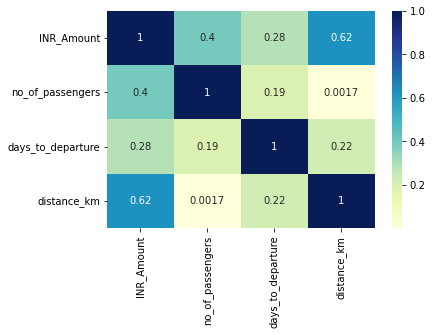

In [169]:
### 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns 
###     in the bookings dataset, have the maximum correlation?

bookings.head()

print(bookings.corr())
sns.heatmap(bookings.corr(), cmap="YlGnBu", annot=True);

In [174]:
#report which pair of numerical columns in the bookings dataset, have the maximum correlation?
ex7a=bookings['INR_Amount'].corr(bookings['distance_km'])
print("Max correlation is between \033[1m[INR Amount]\033[0m and the \033[1m[Distance Kms]\033[0m:", ex7a)

Max correlation is between [INR Amount] and the [Distance Kms]: 0.6235653096997811


In [175]:
### 8. For each service, which is the most used device type for making bookings on the platform?
bookings.head()

n8 = bookings.device_type_used.value_counts().head(1).to_string()
n8a = n8.split()

print(f"!!! '\033[1m{n8a[0]}\033[0m' is most used device with more number of bookings(\033[1m{n8a[1]}\033[0m) !!!")

!!! 'Desktop' is most used device with more number of bookings(142) !!!


In [177]:
### 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, 
### plot a time series for each year and quarter showing the number of bookings performed by each device type
b1=bookings.dropna()

s1=sessions.drop_duplicates()
s2=s1.dropna()

pd.set_option('display.max_rows', None)
unique=pd.merge(b1,s2,on='booking_id',how='inner')

In [180]:
# using the quarter property
unique['booking_time'] = pd.to_datetime(unique['booking_time'])
# using the quarter property
unique['Quarter'] = unique['booking_time'].dt.quarter
# display the dataframe
#print(unique['Quarter'])

In [182]:
unique['booking_time'] = pd.to_datetime(unique['booking_time'])
date=unique['booking_time'].dt.quarter
d6 =unique.groupby(['device_type_used',unique['booking_time'].dt.quarter])['booking_id'].count().reset_index(name='total_bookings').sort_values(['total_bookings'], ascending=False)
d6.head

<bound method NDFrame.head of    device_type_used  booking_time  total_bookings
7           Desktop             4              58
4           Desktop             1              49
8               IOS             1              40
11              IOS             4              34
3           Android             4              30
0           Android             1              21
6           Desktop             3              21
2           Android             3              14
10              IOS             3              14
12        MobileWeb             1              13
5           Desktop             2              13
15        MobileWeb             4               9
9               IOS             2               9
1           Android             2               6
14        MobileWeb             3               4
13        MobileWeb             2               1
16           Tablet             2               1
17           Tablet             3               1
18           Tablet 

In [184]:
d8=pd.to_datetime(unique['booking_time']).dt.date
d9=unique['device_type_used']
d10=unique['booking_id']
d10.head()

0     booking_82
1    booking_156
2     booking_99
3    booking_319
4    booking_222
Name: booking_id, dtype: object

In [186]:
d11=pd.concat([d8,d9,d10],axis=1)
d11['booking_time'] = pd.to_datetime(d11['booking_time'])
d11['Quarter'] = d11['booking_time'].dt.quarter
d11['Quarter_Info'] = d11['booking_time'].dt.date
d11.head()

,booking_time,device_type_used,booking_id,Quarter,Quarter_Info
0,2020-02-05,Desktop,booking_82,1,2020-02-05
1,2018-11-21,Android,booking_156,4,2018-11-21
2,2019-12-16,Android,booking_99,4,2019-12-16
3,2021-10-29,Desktop,booking_319,4,2021-10-29
4,2020-08-11,Android,booking_222,3,2020-08-11


In [188]:
d12=d11.groupby(['Quarter','device_type_used','Quarter_Info'])['booking_id'].count().reset_index(
    name='total_bookings')
d12.head()

,Quarter,device_type_used,Quarter_Info,total_bookings
0,1,Android,2020-01-01,1
1,1,Android,2020-01-24,1
2,1,Android,2020-01-28,2
3,1,Android,2020-01-29,1
4,1,Android,2020-01-31,2


In [189]:
d13=d12.groupby(['Quarter','Quarter_Info','device_type_used','total_bookings'])['total_bookings'].count()
d13

Quarter  Quarter_Info  device_type_used  total_bookings
1        2019-01-03    Desktop           1                 1
         2020-01-01    Android           1                 1
         2020-01-02    IOS               1                 1
         2020-01-04    IOS               1                 1
         2020-01-05    Desktop           1                 1
         2020-01-06    Desktop           1                 1
                       IOS               1                 1
         2020-01-07    Desktop           1                 1
         2020-01-12    Desktop           1                 1
         2020-01-15    MobileWeb         1                 1
         2020-01-16    IOS               1                 1
         2020-01-18    IOS               2                 1
         2020-01-20    Desktop           1                 1
         2020-01-21    IOS               1                 1
                       MobileWeb         1                 1
         2020-01-23    Deskto